# Import all libraries

In [3]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset

In [5]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'

# df = read_csv('ionosphere.csv', header=None)
df = read_csv(path, header=None)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


# Data Preprocessing

In [8]:
# Splitting the data into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

# ensure all values are floatinf types
X = X.astype('float32')

# Encode strings to integer
y = LabelEncoder().fit_transform(y)

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Determine the number of features
n_features = X_train.shape[1]
print('Number of features:', n_features)

(235, 34) (116, 34) (235,) (116,)
Number of features: 34


# Lifecycle of Keras Model

In [10]:
# Step-1 Define Model
model= Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))  # Hidden Layer
model.add(Dense(8, activation='relu', kernel_initializer='he_normal')) # Hidden Layer
model.add(Dense(1, activation='sigmoid'))  # Output Layer
          
# Step-2 Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])
          
# Step-3 Fit the model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0, validation_data=(X_test,y_test)) # Hint: You can change the verbose value to 2 to see epochs
          
# Step-4 Evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy : %.3f' %acc)
          

C:\Users\Sahil\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test accuracy : 0.940


In [11]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             350 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,343 (5.25 KB)

 Trainable params: 447 (1.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 896 (3.50 KB)

None


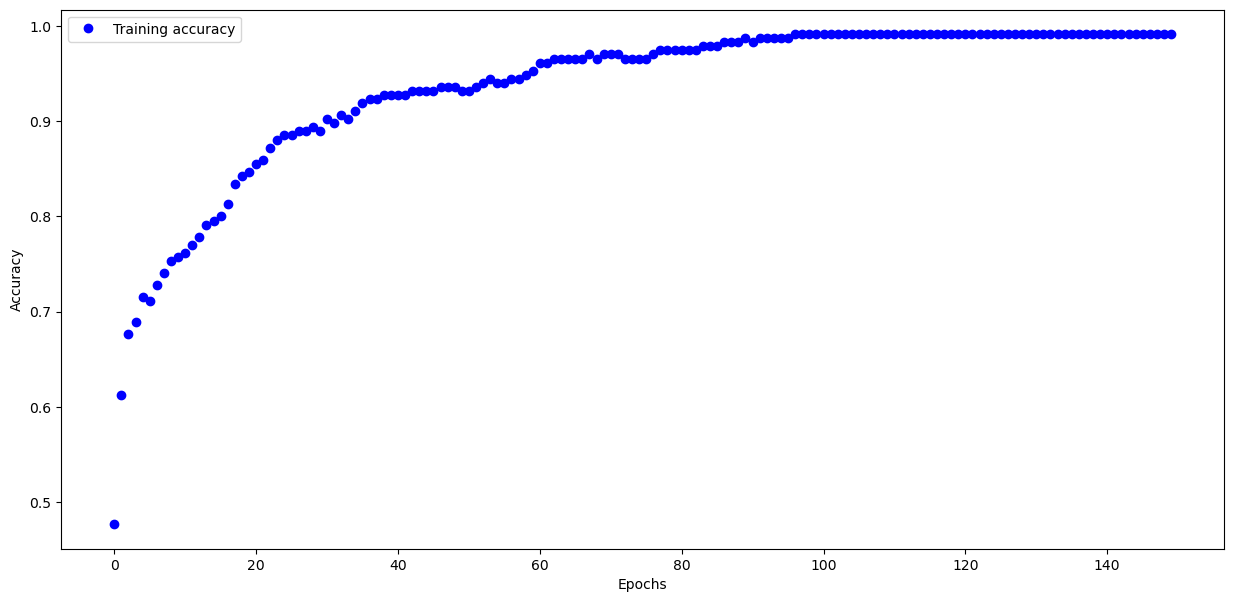

In [12]:
# Accuracy graphs during training
import matplotlib.pyplot as plt

history_dict = history.history
Accuracy = history_dict['accuracy']
plt.figure(num=1, figsize=(15,7))
plt.plot(Accuracy, 'bo', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

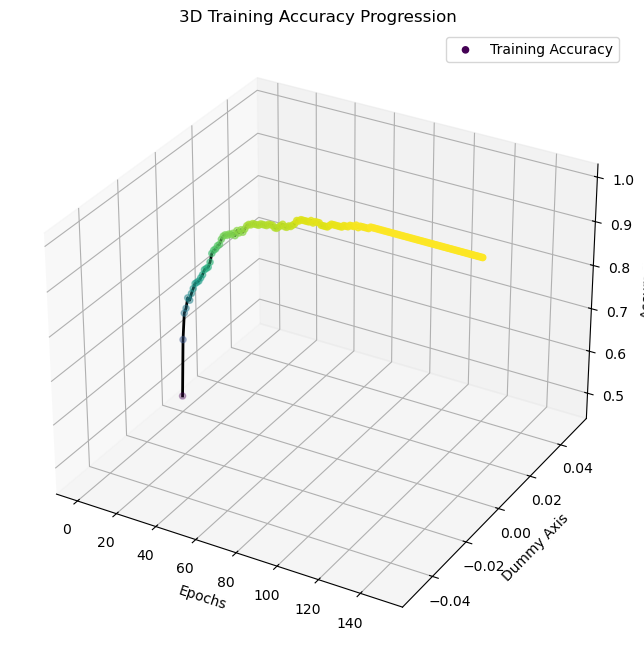

In [13]:
# 3D Accuracy Visualization
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

epochs = np.arange(len(Accuracy))
values = np.zeros_like(epochs)  # Just to align on a 3D plane

ax.scatter(epochs, values, Accuracy, c=Accuracy, cmap='viridis', marker='o', label='Training Accuracy')
ax.plot(epochs, values, Accuracy, color='black', linewidth=2)

ax.set_xlabel('Epochs')
ax.set_ylabel('Dummy Axis')  # This axis is just for 3D effect
ax.set_zlabel('Accuracy')
ax.set_title('3D Training Accuracy Progression')

plt.legend()
plt.show()


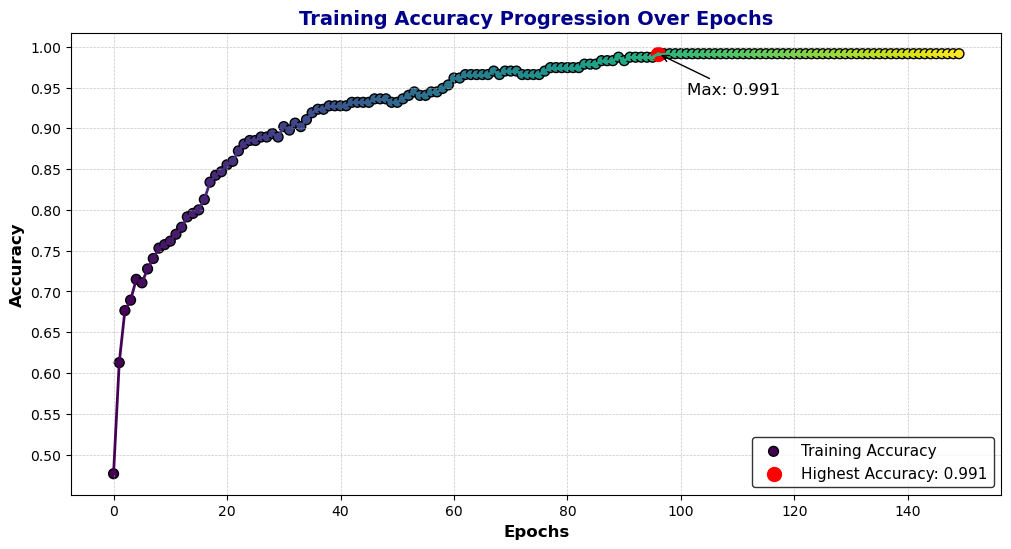

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Extract accuracy values and number of epochs
history_dict = history.history
Accuracy = history_dict['accuracy']
epochs = np.arange(len(Accuracy))

# Define color gradient for epochs
colors = cm.viridis(np.linspace(0, 1, len(epochs)))  # Using Viridis colormap for gradient effect

plt.figure(figsize=(12, 6), dpi=100)

# Plot each segment with a different color
for i in range(len(epochs) - 1):
    plt.plot(epochs[i:i+2], Accuracy[i:i+2], color=colors[i], linewidth=2)

# Adding scatter points at each epoch with corresponding colors
plt.scatter(epochs, Accuracy, c=colors, edgecolors='black', s=50, label='Training Accuracy')

# Customizing grid and labels
plt.xlabel('Epochs', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.title('Training Accuracy Progression Over Epochs', fontsize=14, fontweight='bold', color='darkblue')

# Set y-axis ticks starting from 0.50, increasing by 0.05 up to 1.00
plt.yticks(np.arange(0.50, 1.05, 0.05))

# Adding annotation for max accuracy
max_acc_epoch = np.argmax(Accuracy)
max_acc_value = np.max(Accuracy)
plt.scatter(max_acc_epoch, max_acc_value, color='red', s=100, label=f'Highest Accuracy: {max_acc_value:.3f}')
plt.annotate(f'Max: {max_acc_value:.3f}', xy=(max_acc_epoch, max_acc_value), 
             xytext=(max_acc_epoch+5, max_acc_value-0.05),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=12, color='black')

# Adding a legend with a styled box
plt.legend(loc='lower right', fontsize=11, frameon=True, facecolor='white', edgecolor='black')

# Displaying grid for better readability
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Show the plot
plt.show()


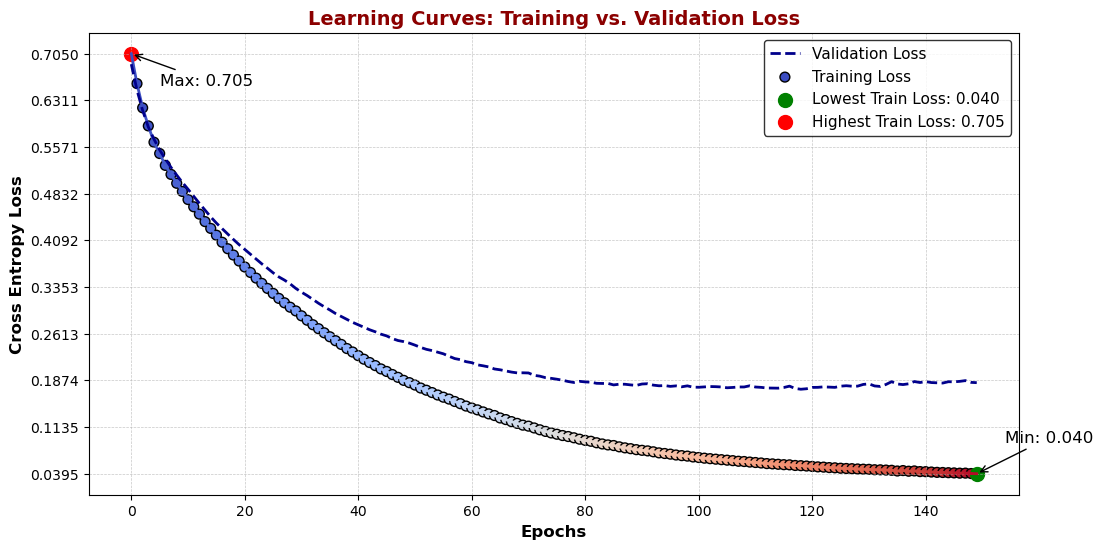

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Extract loss values and number of epochs
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = np.arange(len(train_loss))

# Define color gradient for loss curve
colors = cm.coolwarm(np.linspace(0, 1, len(epochs)))  # Using Coolwarm colormap for gradient effect

plt.figure(figsize=(12, 6), dpi=100)

# Plot training loss with gradient effect
for i in range(len(epochs) - 1):
    plt.plot(epochs[i:i+2], train_loss[i:i+2], color=colors[i], linewidth=2)

# Plot validation loss as a smooth curve
plt.plot(epochs, val_loss, color='darkblue', linestyle='dashed', linewidth=2, label='Validation Loss')

# Adding scatter points at each epoch for clarity
plt.scatter(epochs, train_loss, c=colors, edgecolors='black', s=50, label='Training Loss')

# Customizing labels and title
plt.xlabel('Epochs', fontsize=12, fontweight='bold')
plt.ylabel('Cross Entropy Loss', fontsize=12, fontweight='bold')
plt.title('Learning Curves: Training vs. Validation Loss', fontsize=14, fontweight='bold', color='darkred')

# Set Y-axis ticks dynamically based on range of loss values
plt.yticks(np.linspace(min(min(train_loss), min(val_loss)), max(max(train_loss), max(val_loss)), num=10))

# Highlight min & max loss points
min_loss_epoch = np.argmin(train_loss)
min_loss_value = np.min(train_loss)
plt.scatter(min_loss_epoch, min_loss_value, color='green', s=100, label=f'Lowest Train Loss: {min_loss_value:.3f}')
plt.annotate(f'Min: {min_loss_value:.3f}', xy=(min_loss_epoch, min_loss_value), 
             xytext=(min_loss_epoch+5, min_loss_value+0.05),
             arrowprops=dict(facecolor='green', arrowstyle='->'),
             fontsize=12, color='black')

max_loss_epoch = np.argmax(train_loss)
max_loss_value = np.max(train_loss)
plt.scatter(max_loss_epoch, max_loss_value, color='red', s=100, label=f'Highest Train Loss: {max_loss_value:.3f}')
plt.annotate(f'Max: {max_loss_value:.3f}', xy=(max_loss_epoch, max_loss_value), 
             xytext=(max_loss_epoch+5, max_loss_value-0.05),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=12, color='black')

# Adding a legend with better styling
plt.legend(loc='upper right', fontsize=11, frameon=True, facecolor='white', edgecolor='black')

# Display grid for better readability
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Show the plot
plt.show()


This shows the above particular row belongs to Positive/Good class as we have used Sigmoid activation to evaluate the final output result.

In [29]:
pip install pydot


  Using cached pydot-3.0.4-py3-none-any.whl.metadata (10 kB)
Using cached pydot-3.0.4-py3-none-any.whl (35 kB)


In [17]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import plot_model

# Define input layer
inputs = Input(shape=(n_features,))

# Define hidden layers
x = Dense(10, activation='relu', kernel_initializer='he_normal')(inputs)
x = Dense(8, activation='relu', kernel_initializer='he_normal')(x)

# Define output layer
outputs = Dense(1, activation='sigmoid')(x)

# Create the functional model
functional_model = Model(inputs=inputs, outputs=outputs, name="Functional_Model")

# Compile the model
functional_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
functional_history = functional_model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0, validation_data=(X_test, y_test))

# Evaluate the model
loss, acc = functional_model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy : %.3f' % acc)

# Print model summary
print(functional_model.summary())

# Save model architecture diagram
plot_model(functional_model, to_file='functional_model.png', show_shapes=True, show_layer_names=True)


Test accuracy : 0.948


Model: "Functional_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 34)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             350 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,343 (5.25 KB)

 Trainable params: 447 (1.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 896 (3.50 KB)

None
You must install pydot (`pip install pydot`) for `plot_model` to work.
